In [1]:
import matplotlib.pyplot as plt
from scipy.stats import poisson
from tqdm import tqdm
from functools import lru_cache
import numpy as np

In [2]:
gamma = 0.9 # discount rate

In [3]:
max_l1 = 20
max_l2 = 20

In [4]:
credit_for_rental = 10
cost_to_move = 2

In [5]:
rental_l1 = poisson(mu=3)
rental_l2 = poisson(mu=4)
return_l1 = poisson(mu=3)
return_l2 = poisson(mu=2)

@lru_cache()
def prob_rental_l1(n):
    return rental_l1.pmf(n)

@lru_cache()
def prob_rental_l2(n):
    return rental_l2.pmf(n)

@lru_cache()
def prob_return_l1(n):
    return return_l1.pmf(n)

@lru_cache()
def prob_return_l2(n):
    return return_l2.pmf(n)

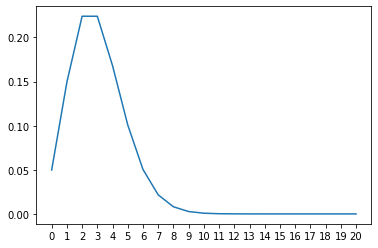

In [6]:
plt.plot([prob_rental_l1(n) for n in range(20 + 1)])
plt.xticks(range(20 + 1));

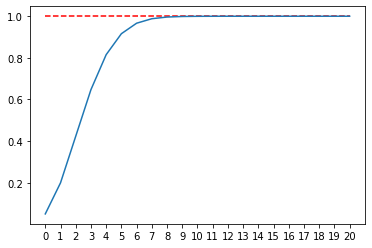

In [7]:
plt.plot([poisson.cdf(n, mu=3) for n in range(20 + 1)])
plt.hlines(1,0,20,linestyle='dashed',color='red')
plt.xticks(range(20 + 1)); # no need to worry about > 20

In [8]:
max_cars_move = 5

In [9]:
def dynamics_reward(state, action):
    has_l1, has_l2 = state
    for rental_requests1 in range(max_l1 + 1):
        p1 = prob_rental_l1(rental_requests1)
        rented_l1 = min(has_l1, rental_requests1)
        r_l1 = rented_l1 * credit_for_rental
        for rental_requests2 in range(max_l2 + 1):
            p2 = prob_rental_l2(rental_requests2)
            rented_l2 = min(has_l2, rental_requests2)
            r_l2 = rented_l2 * credit_for_rental
            for return1 in range(max_l1 + 1):
                p3 = prob_return_l1(return1)
                for return2 in range(max_l2 + 1):
                    p4 = prob_return_l2(return2)
                    have_l1 = has_l1 - rented_l1 - action + return1
                    have_l2 = has_l2 - rented_l2 + action + return2 
                    if (have_l1 < 0) or (have_l2 < 0):
                        continue
                    have_l1 = min(have_l1, max_l1)
                    have_l2 = min(have_l2, max_l2)
                    reward = r_l1 + r_l2 - cost_to_move * abs(action)
                    new_state = (have_l1, have_l2)
                    yield reward, new_state, p1*p2*p3*p4

In [10]:
V = {
    (l1, l2): 0 for l1 in range(max_l1 + 1) for l2 in range(max_l2 + 1) 
}

policy = {
    k: 0 for k in V.keys()
}

In [11]:
theta = 1 # 1e-3

In [12]:
def policy_evaluation():
    while True:
        delta = 0
        for s in tqdm(V.keys(), 'state(pe)'):
            v = V[s]
            V[s] = sum(p * (r + gamma * V[s_p]) for r, s_p, p in dynamics_reward(s, policy[s]))
            delta = max(delta, abs(v - V[s]))
        print(delta)
        if delta < theta:
            break # V[s] now holds the value for policy

In [13]:
policy_evaluation()

state(pe):   0%|▏                                                                      | 1/441 [00:00<01:21,  5.41it/s]

193.34904787428417


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:21,  5.41it/s]

134.00425974869276


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:22,  5.35it/s]

90.45243676948189


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:21,  5.41it/s]

67.59779036647134


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:20,  5.43it/s]

53.58492992838734


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:23,  5.26it/s]

41.72086224079544


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:20,  5.46it/s]

32.720108750795134


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:23,  5.29it/s]

26.087555521978743


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:21,  5.37it/s]

21.77814281594715


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:21,  5.38it/s]

18.318059244390952


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:22,  5.35it/s]

15.367405838268724


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:22,  5.35it/s]

12.861026653932925


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:23,  5.29it/s]

10.739286262152575


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:23,  5.30it/s]

8.94900375748017


state(pe):   0%|                                                                               | 0/441 [00:00<?, ?it/s]

7.443128085634385


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:22,  5.32it/s]

6.180205955673614


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:23,  5.26it/s]

5.123897017011529


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:21,  5.38it/s]

4.242540104623174


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:18,  5.58it/s]

3.508736655413884


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:17,  5.66it/s]

2.8989343693046408


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:17,  5.69it/s]

2.3930118820198913


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:18,  5.61it/s]

1.973873439026704


state(pe):   0%|                                                                               | 0/441 [00:00<?, ?it/s]

1.627063710307084


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:17,  5.70it/s]

1.340410695757157


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:28,  4.99it/s]

1.1037015733500084


state(pe): 100%|█████████████████████████████████████████████████████████████████████| 441/441 [01:24<00:00,  5.21it/s]

0.9083935035057493


In [21]:
def draw_policy(policy):
    arr = np.zeros((max_l1 + 1, max_l2 + 1))
    for key, value in policy.items():
        arr[key] = value
    plt.imshow(arr)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.ylabel('location 1')
    plt.xlabel('location 2')
    plt.show()

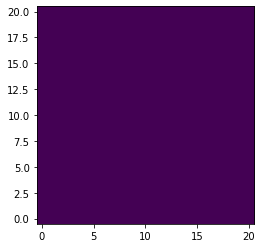

In [15]:
draw_policy(policy)

In [16]:
def policy_improvement():
    max_iterations=5
    while True:
        policy_stable = True
        for s in tqdm(V.keys(), "state(pi)", leave=True):
            old_action = policy[s]
#             print(old_action)
            action_expected_reward = {
                action: sum(p * (r + gamma * V[s_p]) for r, s_p, p in dynamics_reward(s, action))
                for action in range(-max_cars_move, max_cars_move + 1)
            }
#             print(action_expected_reward)
#             print('max ->', max(action_expected_reward, key=action_expected_reward.get))
            new_action = max(action_expected_reward, key=action_expected_reward.get)
            policy_stable = policy_stable and (old_action == new_action)  # potential bug if new state with same value
#             print('->', new_action)
            policy[s] = new_action
#             print(policy_stable)
        if policy_stable:
            break
        max_iterations -= 1
        if max_iterations < 1:
            break
        print('calling policy_evaluation')
        policy_evaluation()
        draw_policy(policy)

state(pe):   0%|▏                                                                      | 1/441 [00:00<01:23,  5.28it/s]

calling policy_evaluation


state(pe):   0%|                                                                               | 0/441 [00:00<?, ?it/s]

46.831499780531715


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:21,  5.41it/s]

3.6427693878594027


state(pe):   0%|                                                                               | 0/441 [00:00<?, ?it/s]

2.1680035718733848


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:27,  5.06it/s]

1.586190772550765


state(pe):   0%|                                                                               | 0/441 [00:00<?, ?it/s]

1.3013523290202897


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:26,  5.09it/s]

1.1504466176330652


state(pe): 100%|█████████████████████████████████████████████████████████████████████| 441/441 [01:22<00:00,  5.36it/s]

0.9685681748036927


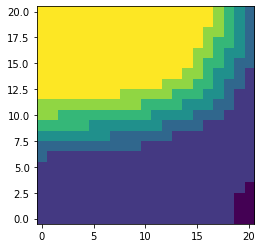

state(pe):   0%|                                                                               | 0/441 [00:00<?, ?it/s]

calling policy_evaluation


state(pe):   0%|                                                                               | 0/441 [00:00<?, ?it/s]

5.13322727886009


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:28,  4.99it/s]

3.043572799082881


state(pe):   0%|▏                                                                      | 1/441 [00:00<01:20,  5.44it/s]

1.9776167984275617


state(pe):   0%|                                                                               | 0/441 [00:00<?, ?it/s]

1.3108686455935867


state(pe): 100%|█████████████████████████████████████████████████████████████████████| 441/441 [01:24<00:00,  5.20it/s]

0.8689773311747331


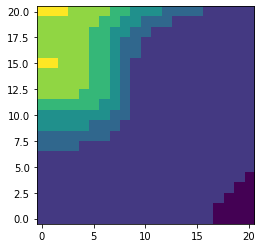

state(pe):   0%|▏                                                                             | 1/441 [00:00<01:21,  5.40it/s]

calling policy_evaluation


state(pe): 100%|████████████████████████████████████████████████████████████████████████████| 441/441 [01:21<00:00,  5.43it/s]

0.8214682593877569


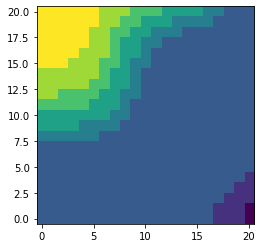

state(pe):   0%|▏                                                                             | 1/441 [00:00<01:16,  5.76it/s]

calling policy_evaluation


state(pe): 100%|████████████████████████████████████████████████████████████████████████████| 441/441 [01:21<00:00,  5.39it/s]

0.4706239098338756


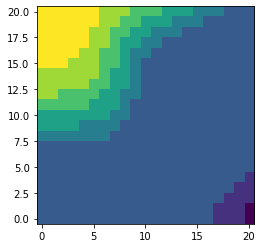

state(pi): 100%|████████████████████████████████████████████████████████████████████████████| 441/441 [14:04<00:00,  1.92s/it]


In [17]:
policy_improvement()

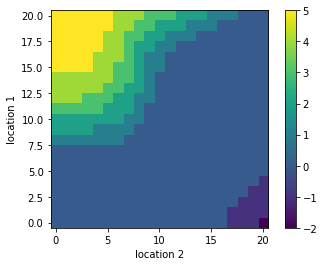

In [22]:
draw_policy(policy)